
=== Verifying Short-Range Dependence / MA (Air Quality) ===


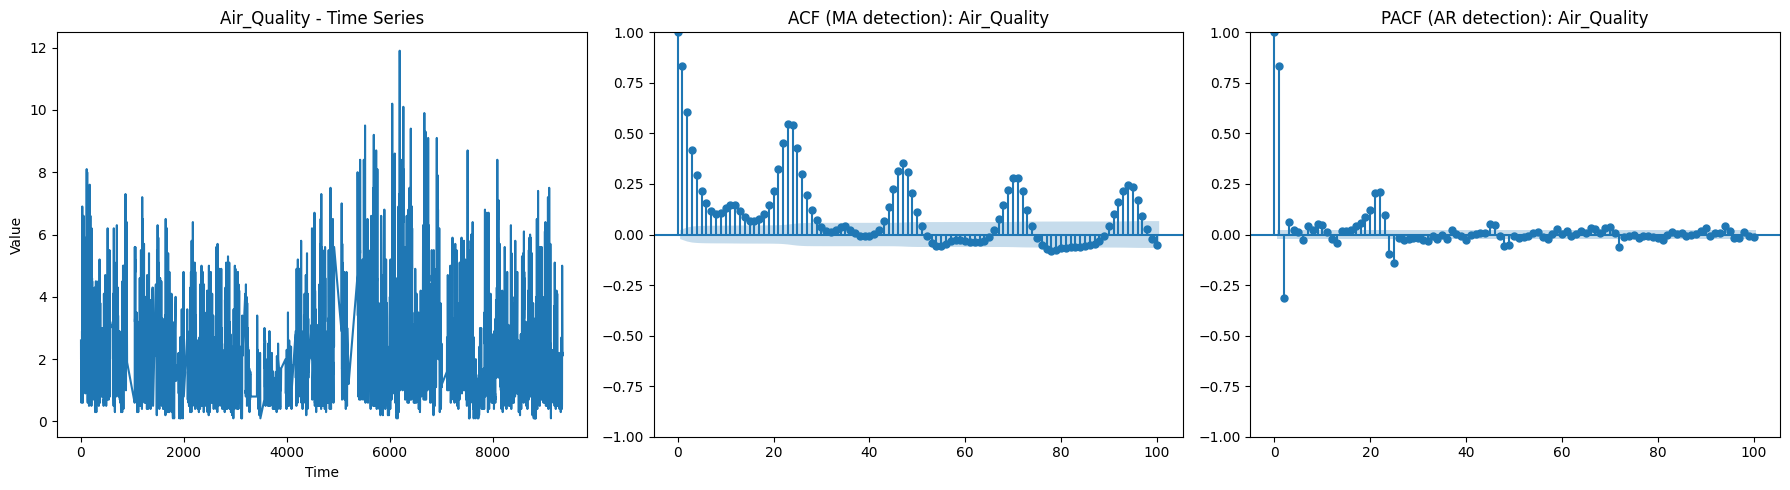


=== Verifying Integrated/Trend Process (CNNpred: S&P 500) ===
--- Raw Close Prices ---
ADF Statistic: 0.0489
p-value: 0.9624
Stationary? No



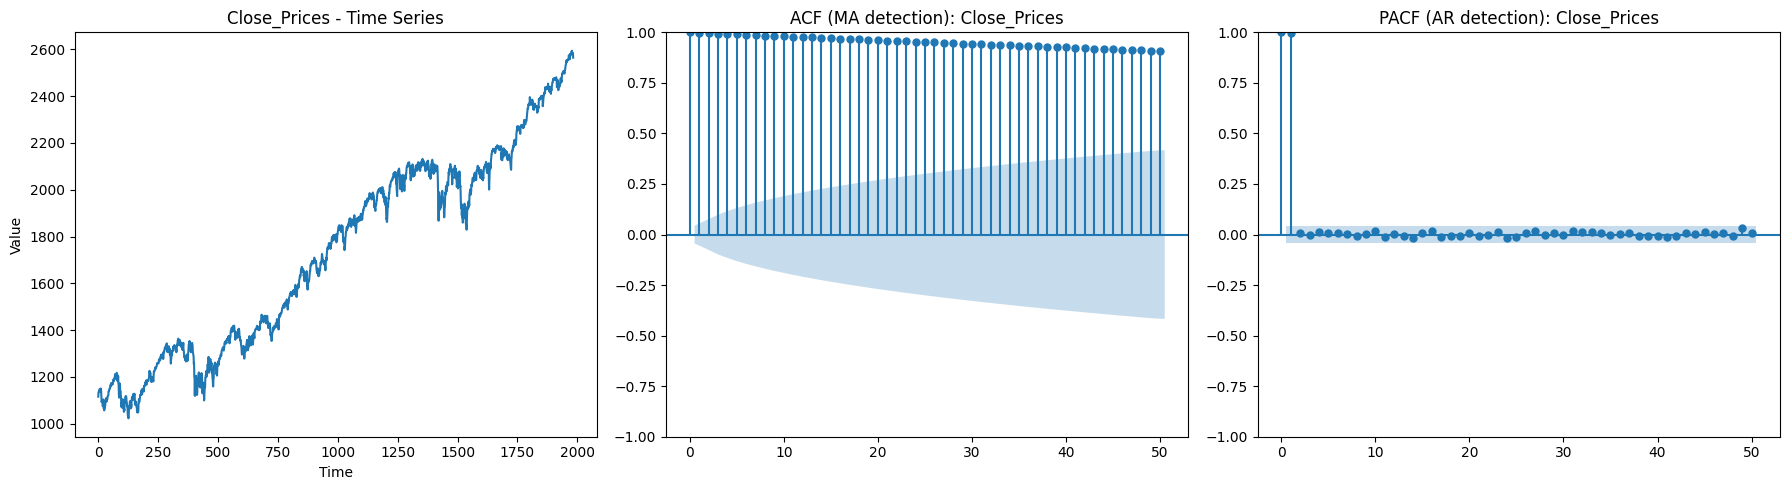

--- Differenced (Returns) ---
ADF Statistic: -9.5577
p-value: 0.0000
Stationary? Yes



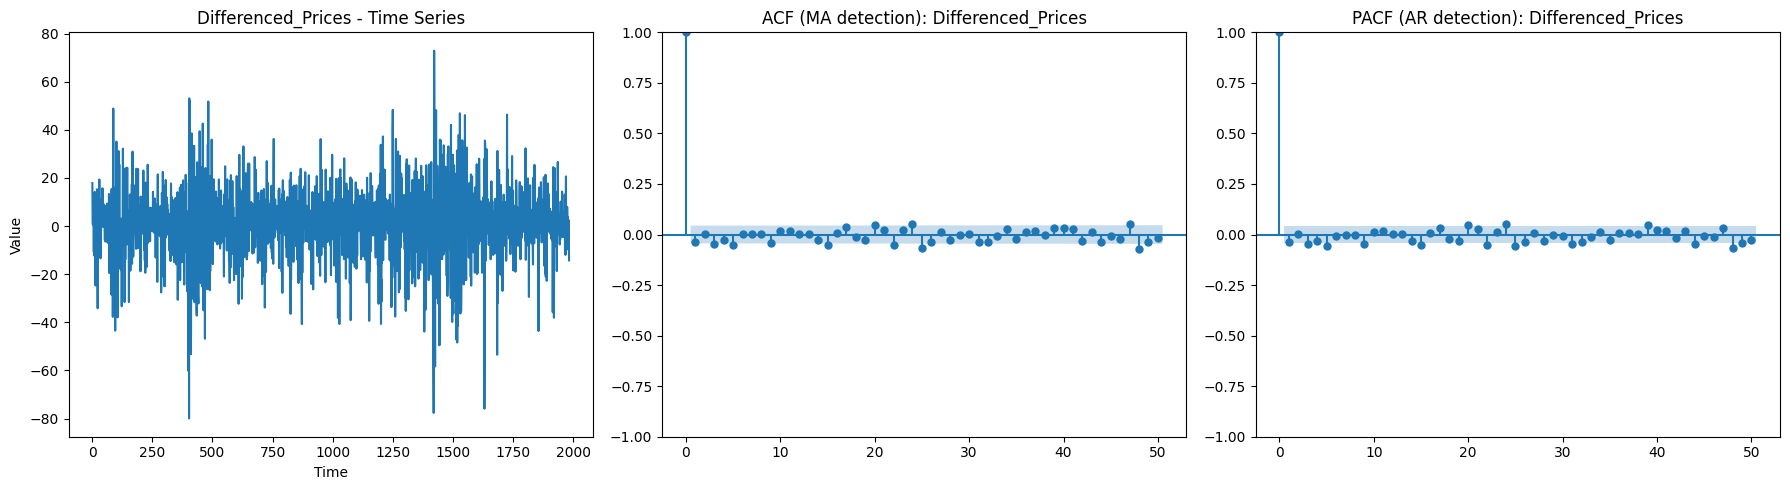

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries, title="Stationarity Check"):

    print(f"--- {title} ---")
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print(f"ADF Statistic: {dftest[0]:.4f}")
    print(f"p-value: {dftest[1]:.4f}")
    is_stationary = dftest[1] < 0.05
    print(f"Stationary? {'Yes' if is_stationary else 'No'}\n")
    return is_stationary

def plot_diagnostics(series, title, lags=40):

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    axes[0].plot(series)
    axes[0].set_title(f"{title} - Time Series")
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel("Value")

    plot_acf(series.dropna(), ax=axes[1], lags=lags, title=f"ACF (MA detection): {title}")
    
    plot_pacf(series.dropna(), ax=axes[2], lags=lags, title=f"PACF (AR detection): {title}")
    
    plt.tight_layout()
    plt.savefig(f"figures/diagnostics_{title.replace(' ', '_').lower()}.pdf")
    plt.show()
    
def verify_ma_air_quality(file_path):

    df = pd.read_csv(file_path, sep=';', decimal=',')
    
    df = df.dropna(how='all', axis=1).dropna(how='any', axis=0)
    
    series = df['CO(GT)'].replace(-200, np.nan).dropna()
    
    short_series = series.iloc[:]
    
    print("\n=== Verifying Short-Range Dependence / MA (Air Quality) ===")

    plot_diagnostics(short_series, "Air_Quality", lags=100)

def verify_arima_cnnpred(file_path):

    df = pd.read_csv(file_path)
    
    target_col = 'Close'
    if target_col not in df.columns:
        print(f"Columns found: {df.columns}")
        return

    series = df[target_col]
    
    print("\n=== Verifying Integrated/Trend Process (CNNpred: S&P 500) ===")
    
    check_stationarity(series, "Raw Close Prices")
    plot_diagnostics(series, "Close_Prices", lags=50)
    
    diff_series = series.diff().dropna()
    check_stationarity(diff_series, "Differenced (Returns)")
    plot_diagnostics(diff_series, "Differenced_Prices", lags=50)


verify_ma_air_quality('Air Quality/AirQualityUCI.csv')
verify_arima_cnnpred('CNN-based stock market prediction/Processed_S&P.csv')